The goal of the Flexible Representation of Quantum Images (FRQI) is to provide a quantum representation of images that allows an efficient encoding of the classical data into a quantum state and the subsequent use of operators for image processing operations.
In this case, encoding the classical image into a quantum state requires a polynomial number of simple gates.


# Use case: Flexible Representation of Quantum Images (FRQI)


## 1. The FRQI State

The quantum state representing the image is:

$$
\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}
\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}
\ket{I(\theta)}=\frac{1}{2^{n} }\sum_{i=0}^{2^{2n}-1}\left(\cos \theta_{i}\ket{0}+\sin\theta_{i}\ket{1}\right)\otimes\ket{i}
\label{eq:FRQI_state} \tag{1.1}
$$

$$
 \theta_{i}\in\left[ 0,\frac{\pi}{2}\right], i = 0,1,\cdots,2^{2n}-1
 \label{eq:FRQI_angle} \tag{1.2}
$$







The FRQI state is a normalized state as from equation $\eqref{eq:FRQI_state}$ we see that $\left\|I(\theta)\right\|=1$
and is made of two parts:

* color information encoding: $\cos\theta_{i}\ket{0}+\sin\theta_{i}\ket{1}$ 
* associated pixel position encoding: $\ket{i}$


A simple example for a $2\times2$ image is given below, with corresponding $\theta$ angles (color encoding) and associated kets (position encoding) :

$$
\begin{array}{|c|c|}
\hline
\theta_{0},\ket{00} & \theta_{1},\ket{01}  \\
\hline
\theta_{2},\ket{10} & \theta_{3},\ket{11} \\
\hline
\end{array}
$$

And the equivalent quantum state is

$$
\begin{aligned}
\ket{I}=\frac{1}{2}[ \; & \phantom{+} \left(\cos\theta_{0}\ket{0}+\sin\theta_{0}\ket{1} \right)\otimes\ket{00}&\\
& + \left(\cos\theta_{1}\ket{0}+\sin\theta_{1}\ket{1} \right)\otimes\ket{01} \\
& + \left(\cos\theta_{2}\ket{0}+\sin\theta_{2}\ket{1} \right)\otimes\ket{10}\\
& + \left(\cos\theta_{3}\ket{0}+\sin\theta_{3}\ket{1} \right)\otimes\ket{11} \;]
\end{aligned}
\label{eq:22state} \tag{1.3}
$$


## 2. Building the FRQI State: A Two Step Process

Going from an initialized state $\ket{0}^{\otimes2n+1}$ to the FRQI state specified in $\eqref{eq:FRQI_state}$ is a two steps process and we first need to put the system in full superposition, except for the last qubit which we will use to encode the color. $H^{\otimes2n}$ being the tensor product of $2n$ Hadamard operations, our intermediate state is 

$$
\ket{H}=\frac{1}{2^{n} }\ket{0}\otimes\sum_{i=0}^{2^{2n}-1}\ket{i}=\mathcal{H}\left(\ket{0}^{\otimes2n+1}\right)
\label{eq:superpos} \tag{2.1}
$$



As demonstrated in [1] there exist a unitary transformation $\mathcal{P}=\mathcal{RH}$ transforming the initial state $\ket{0}^{\otimes2n+1}$ into the FRQI $I(\theta)$ state and  

$$
\mathcal{R}\ket{H}=\left(\prod_{i=0}^{2^{2n}-1}R_{i}\right)\ket{H}=\ket{I(\theta)}
\tag{2.2}
$$



The $R_{i}$ operations are controlled rotations matrices defined by:

$$
R_{i}=\left( I\otimes \sum^{2^{2n}-1}_{j=0,j\neq i}\ket{j}\bra{j}\right) + R_{y}\left(2\theta_{i}\right)\otimes\ket{i}\bra{i} \tag{2.3}
$$

Where $R_{y}(2\theta_{i})$ are the standard rotation matrices:

$$
R_{y}(2\theta_{i})=
\begin{pmatrix}
\cos\theta_{i} & -\sin\theta_{i}\\
\sin\theta_{i} & \cos\theta_{i} 
\end{pmatrix} \tag{2.4}
$$


The controlled rotations can be implemented via the generalized $C^{2n}\left( R_{y}(2\theta_{i}) \right) $, which can be broken down into standard rotations and $CNOT$ gates.
For instance if we take the case for $n=1$, which means we have $4$ pixels (i.e. a $2\times2$ image), we do have the following equivalence, which can then be implemented easily.

![](images/circ_eq.png "Circuit Equivalence") 

Note that we still need to take care of the increment in the pixel location, this is done via the $X$ gates.



## 3.  Implementation and Measurement : 2×2 Image with Greyscale Values

Barriers are used for added clarity on the different blocks associated with individual pixels.
We also use greyscale images (i.e. the L component of a LRGB image), which means only one value is of interest for the color encoding: the intensity. In other words, all angles $\theta_{i}$ equal to $0$ means that all the pixels are black, if all $\theta_{i}$ values are equal to $\pi/2$ then all the pixels are white, and so on. The values of interest are $0, \pi/4 \; and \; \pi/2$.

### 3.1 Example : $\theta_{i}=\pi/2 \;, \; \forall i$ - all pixels at maximum intensity

In [1]:
# Importing standard Qiskit libraries and configuring account
import qiskit as qk
from qiskit import QuantumCircuit, Aer, IBMQ
from qiskit import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_histogram
from math import pi

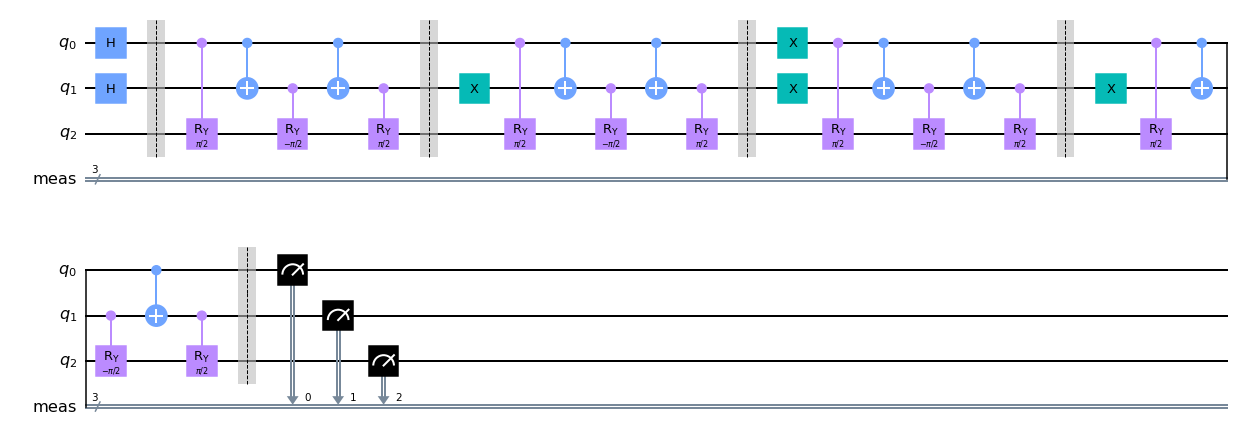

In [2]:
theta = pi/2  # all pixels white
qc1 = QuantumCircuit(3)

qc1.h(0)
qc1.h(1)

qc1.barrier()
#Pixel 1

qc1.cry(theta,0,2)
qc1.cx(0,1)
qc1.cry(-theta,1,2)
qc1.cx(0,1)
qc1.cry(theta,1,2)

qc1.barrier()
#Pixel 2

qc1.x(1)

qc1.cry(theta,0,2)
qc1.cx(0,1)
qc1.cry(-theta,1,2)
qc1.cx(0,1)
qc1.cry(theta,1,2)

qc1.barrier()

qc1.x(1)
qc1.x(0)
qc1.cry(theta,0,2)
qc1.cx(0,1)
qc1.cry(-theta,1,2)
qc1.cx(0,1)
qc1.cry(theta,1,2)


qc1.barrier()

qc1.x(1)

qc1.cry(theta,0,2)
qc1.cx(0,1)
qc1.cry(-theta,1,2)
qc1.cx(0,1)
qc1.cry(theta,1,2)

qc1.measure_all()

qc1.draw(output='mpl')

### 4 Circuit Analysis

In [3]:
print("Depth : ", qc1.depth())
print("Operations: ", qc1.count_ops())

Depth :  23
Operations:  OrderedDict([('cry', 12), ('cx', 8), ('barrier', 5), ('x', 4), ('measure', 3), ('h', 2)])


This does not look too complex but if we want to see how this circuit can be unrolled by the transpiler, it gets a bit more complicated.

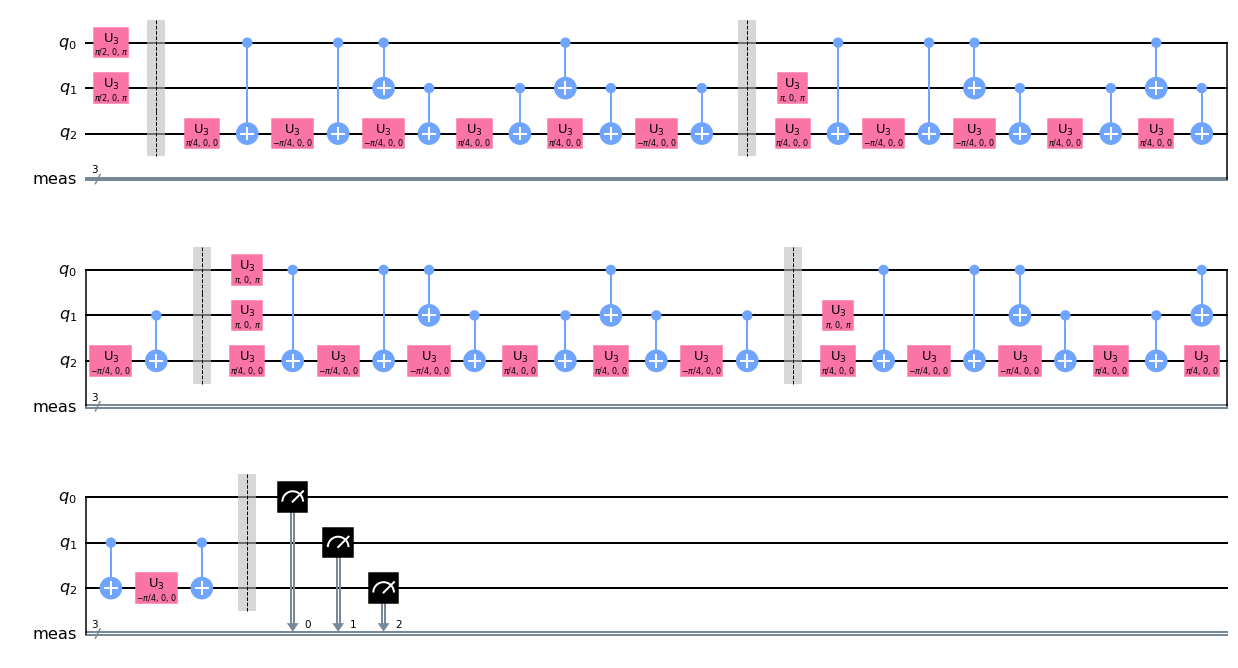

In [4]:
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circ = pm.run(qc1)
new_circ.draw(output='mpl')

and if we look again at the depth and number of operations

In [5]:
print("Depth : ", new_circ.depth())
print("Operations: ", new_circ.count_ops())

Depth :  50
Operations:  OrderedDict([('cx', 32), ('u3', 30), ('barrier', 5), ('measure', 3)])


The depth for example doubled in size ! 


comparing the unrolling from qiskit with  rebaseibm from tket 

In [6]:
from pytket.extensions.qiskit import IBMQBackend, AerStateBackend
from pytket import Circuit, OpType
from pytket.predicates import GateSetPredicate, NoMidMeasurePredicate
from pytket.extensions.qiskit import tk_to_qiskit, qiskit_to_tk

qc1tk=qiskit_to_tk(qc1)
qc1tk_back=qc1tk.copy()

In [7]:
from pytket.passes import RebaseIBM, RebasePyZX

RebaseIBM().apply(qc1tk)
print("Depth", qc1tk.depth())
print("Gates", qc1tk.n_gates)
print("CXs", qc1tk.n_gates_of_type(OpType.CX))
print("U3ss", qc1tk.n_gates_of_type(OpType.U3))
print("Barrier", qc1tk.n_gates_of_type(OpType.Barrier))
print("Measure", qc1tk.n_gates_of_type(OpType.Measure))

Depth 55
Gates 70
CXs 32
U3ss 30
Barrier 5
Measure 3


note the number of barriers included or not in the depth depending of the framework

We can get closer to what would actually be run on a real device by feeding the transpiler with a device coupling map (for instance, Athens). We will also use optimization level 3.


In [8]:
from qiskit.test.mock import FakeAthens
fake_athens = FakeAthens()
# The device coupling map is needed for transpiling to correct
# CNOT gates before simulation
coupling_map = fake_athens.configuration().coupling_map
optimized_3 = transpile(qc1,backend=fake_athens, seed_transpiler=11, optimization_level=3)
#print('gates = ', optimized_3.count_ops())
print('depth = ', optimized_3.depth())
print('total number of gates = ', optimized_3.size())

depth =  160
total number of gates =  203


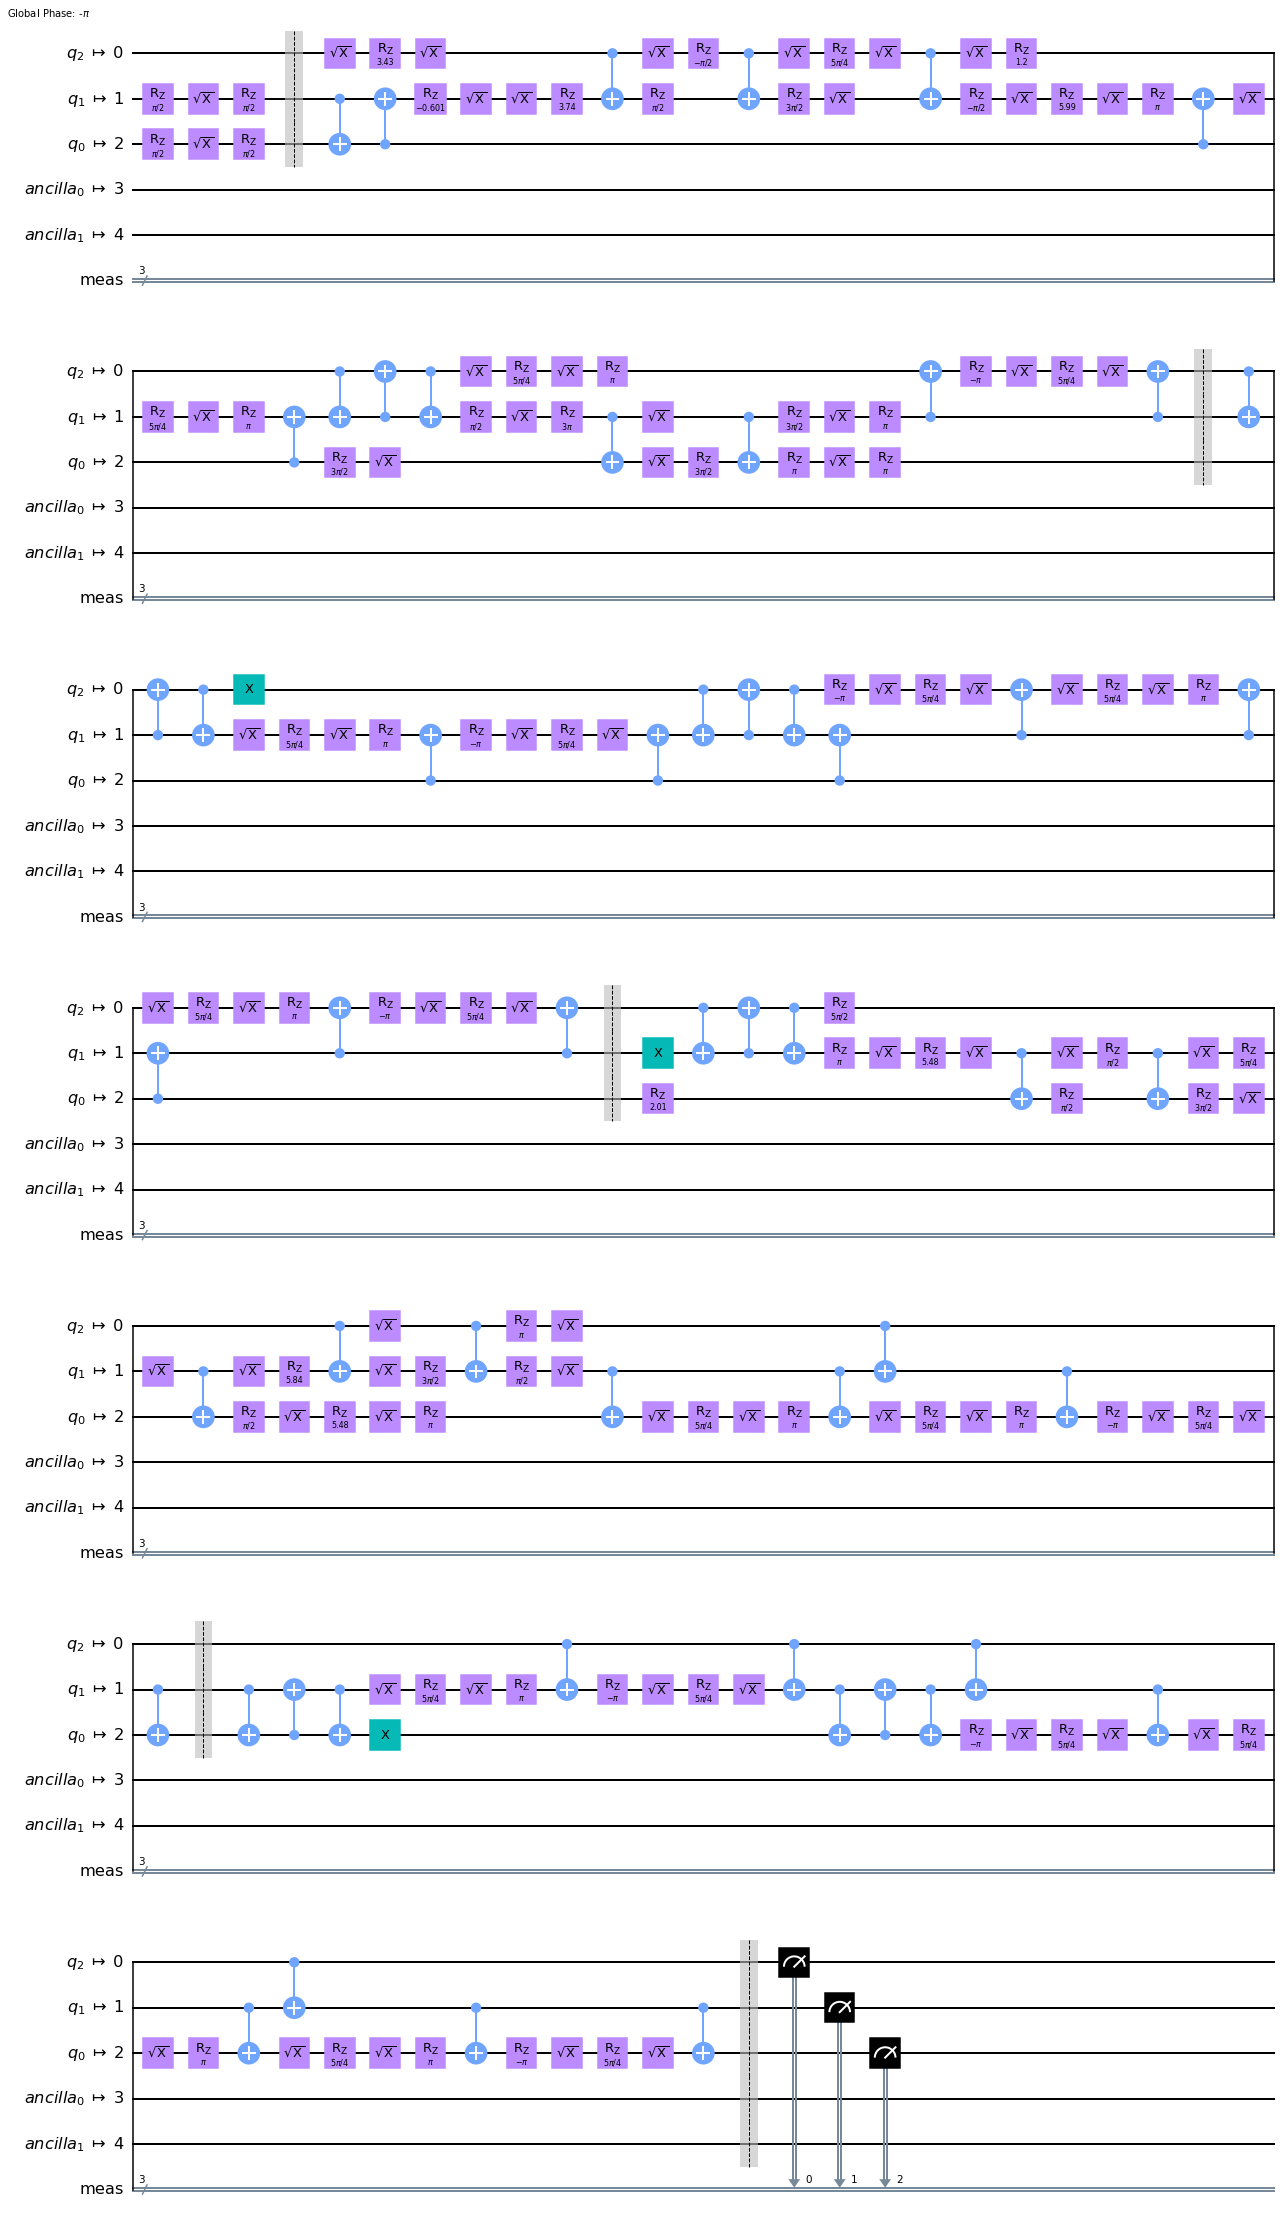

In [9]:
optimized_3.draw(output='mpl')

In [10]:
from pytket.utils import prepare_circuit

circ1=qc1tk_back
#b = AerBackend()
b = IBMQBackend("ibmq_athens")
test = circ1.copy()
#RebaseIBM().apply(test)
#b.default_compilation_pass(2).apply(test)
c0, ppcirc = prepare_circuit(test)


In [11]:
b.compile_circuit(c0,2)
#b.compile_circuit(test,2)
#assert b.valid_circuit(test)
print("Optimisation level", 2)
print("Depth", c0.depth())
print("Gates", c0.n_gates)
#print("CXs", c0.n_gates_of_type(OpType.CX))
#print("Rzs", c0.n_gates_of_type(OpType.Rz))
#print("Sxs", c0.n_gates_of_type(OpType.SX))

Optimisation level 2
Depth 135
Gates 176


# Integrating pytket into Qiskit software - example

Let's take as an example an ansatz for computing the ground-state energy of a hydrogen molecule.

In [12]:
from qiskit.opflow.primitive_ops import PauliSumOp


In [13]:
H2_op = PauliSumOp.from_list(
    [
        ("II", -1.052373245772859),
        ("IZ", 0.39793742484318045),
        ("ZI", -0.39793742484318045),
        ("ZZ", -0.01128010425623538),
        ("XX", 0.18093119978423156),
    ]
)


First let's use qiskit's NumPyEigensolver to compute the exact answer:



In [14]:
from qiskit.algorithms import NumPyEigensolver


In [15]:
es = NumPyEigensolver(k=1)
exact_result = es.compute_eigenvalues(H2_op).eigenvalues[0].real
print("Exact result:", exact_result)


Exact result: -1.857275030202379


The following function will attempt to find an approximation to this using VQE, given a qiskit QuantumInstance on which to run circuits:



In [16]:
from qiskit.algorithms import VQE
from qiskit.algorithms.optimizers import SPSA
from qiskit.circuit.library import EfficientSU2


In [17]:
def vqe_solve(op, maxiter, quantum_instance):
    optimizer = SPSA(maxiter=maxiter)
    ansatz = EfficientSU2(op.num_qubits, entanglement="linear")
    vqe = VQE(ansatz=ansatz, optimizer=optimizer, quantum_instance=quantum_instance)
    return vqe.compute_minimum_eigenvalue(op).eigenvalue


We will run this on a pytket IBMQEmulatorBackend. This is a noisy simulator whose characteristics match those of the real device, in this case "ibmq_belem" (a 5-qubit machine). The characteristics are retrieved from the device when the backend is constructed, so we must first load our IBMQ account. Circuits will be compiled to match the connectivity of the device and simulated using a basic noise model constructed from the device parameters

In [18]:
from pytket.extensions.qiskit import IBMQEmulatorBackend
from qiskit import IBMQ

In [19]:
IBMQ.load_account()
b_emu = IBMQEmulatorBackend("ibmq_belem", hub="ibm-q", group="open", project="main")


ibmqfactory.load_account:WARNING:2021-06-18 01:14:22,180: Credentials are already in use. The existing account in the session will be replaced.


Most qiskit algorithms require a qiskit QuantumInstance as input; this in turn is constructed from a qiskit.providers.Backend. The TketBackend class wraps a pytket backend as a qiskit.providers.Backend.



In [20]:
from pytket.extensions.qiskit.tket_backend import TketBackend
from qiskit.utils import QuantumInstance


In [21]:
qis_backend = TketBackend(b_emu)
qi = QuantumInstance(qis_backend, shots=8192, wait=0.1)


Note that we could have used any other pytket shots backend instead of b_emu here. The pytket extension modules provide an interface to a wide variety of devices and simulators from different quantum software platforms.

We can now run the VQE algorithm. In this example we use only few iterations, but greater accuracy may be achieved by increasing this number:

In [22]:
print("VQE result:", vqe_solve(H2_op, 10, qi))


/Users/mbozzore/opt/anaconda3/envs/tket_demo_3/lib/python3.9/site-packages/qiskit/assembler/disassemble.py:130: DeprecationWarning: The QuantumCircuit.u2 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You can use the general 1-qubit gate QuantumCircuit.u instead: u2(φ,λ) = u(π/2, φ, λ). Alternatively, you can decompose it interms of QuantumCircuit.p and QuantumCircuit.sx: u2(φ,λ) = p(π/2+φ) sx p(λ-π/2) (1 pulse on hardware).
  _inst = instr_method(*params, *qubits, *clbits)


VQE result: -1.3593891909526155


Another way to improve the accuracy of results is to apply optimisations to the circuit in an attempt to reduce the overall noise. When we construct our qiskit backend, we can pass in a pytket compilation pass as an additional parameter. There is a wide range of options here; in this example we will use FullPeepholeOptimise, which is a powerful general-purpose pass.

In order to satisfy the gate-set constraints of pytket compilation passes, it is sometimes necessary to get qiskit to "unroll" to a certain gate set first; this we can do by passing a PassManager to the QuantumInstance constructor, as illustrated below.



In [23]:
from pytket.passes import FullPeepholeOptimise
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller


In [24]:
qis_backend2 = TketBackend(b_emu, FullPeepholeOptimise())
qi2 = QuantumInstance(
    qis_backend2,
    pass_manager=PassManager(Unroller(["cx", "h", "rx", "ry", "rz"])),
    shots=8192,
    wait=0.1,
)


Let's run  again:



In [25]:
print("VQE result (with optimisation):", vqe_solve(H2_op, 10, qi2))


VQE result (with optimisation): -1.5261572901077471


These are small two-qubit circuits, so the improvement may be small, but with larger, more complex circuits, the reduction in noise from compilation will make a greater difference and allow VQE experiments to converge with fewer iterations.